# capstone-stonerogers
Capstone Project for M.S. Data Analytics Program

Melissa Stone Rogers, [GitHub](https://github.com/meldstonerogers/capstone-stonerogers), April 3, 2025

## Introduction 
This is a professional project exaiming trends in suicide rates over time. Data has been gathered from Center for Disease Control using
the Web-based Injury Statistics Query and Reporting System [(WISQARS)](https://wisqars.cdc.gov/about/fatal-injury-data/). 

Commands were used on a Mac machine running zsh.

## Import Dependencies 

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns 
import seaborn.objects as so

## Data Acquisition

In [51]:
# Load dataset into a pandas DataFrame. 
df = pd.read_csv('data/suicide_trends.csv')

# Display and inspect first rows of the DataFrame
print(df.head())

     state  year      sex                             race deaths  population  \
0  Alabama  2023    Males                            White    578     1734260   
1  Alabama  2023    Males                            Black     91      633291   
2  Alabama  2023    Males  American Indian / Alaska Native    0**       19472   
3  Alabama  2023  Females                            White    160     1785216   
4  Alabama  2023  Females                            Black     21      726984   

  crude_rate age_adjusted_rate years_pll  
0      33.33             32.24    10,506  
1      14.37             14.87     2,416  
2     0.00**            0.00**       NaN  
3       8.96               8.9     3,009  
4       2.89              2.89       602  


## Initial Data Inspection

In [52]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

     state  year      sex                             race deaths  population  \
0  Alabama  2023    Males                            White    578     1734260   
1  Alabama  2023    Males                            Black     91      633291   
2  Alabama  2023    Males  American Indian / Alaska Native    0**       19472   
3  Alabama  2023  Females                            White    160     1785216   
4  Alabama  2023  Females                            Black     21      726984   
5  Alabama  2022    Males                            White    570     1723722   
6  Alabama  2022    Males                            Black     98      631445   
7  Alabama  2022    Males     HI Native / Pacific Islander    0**        3131   
8  Alabama  2022  Females                            White    145     1773310   
9  Alabama  2022  Females                            Black   13**      723405   

  crude_rate age_adjusted_rate years_pll  
0      33.33             32.24    10,506  
1      14.37          

## Initial Data Transformation and Feature Engineering, if needed

In [53]:
# Delete unused features 
df = df.drop(['crude_rate', 'age_adjusted_rate'], axis=1)

In [54]:
# Convert deaths and years_pll data from object to int64 
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce')
df['years_pll'] = pd.to_numeric(df['years_pll'], errors='coerce')

In [66]:
# Replace all NaN with 0. 
df.fillna(0)

,state,year,sex,race,deaths,population,years_pll
0,Alabama,2023,Males,White,578.0,1734260,0.0
1,Alabama,2023,Males,Black,91.0,633291,0.0
2,Alabama,2023,Males,American Indian / Alaska Native,0.0,19472,0.0
3,Alabama,2023,Females,White,160.0,1785216,0.0
4,Alabama,2023,Females,Black,21.0,726984,602.0
...,...,...,...,...,...,...,...
2238,Wyoming,2018,Females,White,38.0,263225,673.0
2239,Wyoming,2018,Females,Black,0.0,2864,0.0
2240,Wyoming,2018,Females,American Indian / Alaska Native,0.0,8034,0.0
2241,Wyoming,2018,Females,Asian,0.0,3407,0.0


In [71]:
# Inspect data again to verify changes
print(df.head(10))
print(df.shape)
print(df.dtypes)

     state  year      sex                             race  deaths  \
0  Alabama  2023    Males                            White   578.0   
1  Alabama  2023    Males                            Black    91.0   
2  Alabama  2023    Males  American Indian / Alaska Native     NaN   
3  Alabama  2023  Females                            White   160.0   
4  Alabama  2023  Females                            Black    21.0   
5  Alabama  2022    Males                            White   570.0   
6  Alabama  2022    Males                            Black    98.0   
7  Alabama  2022    Males     HI Native / Pacific Islander     NaN   
8  Alabama  2022  Females                            White   145.0   
9  Alabama  2022  Females                            Black     NaN   

   population  years_pll  
0     1734260        NaN  
1      633291        NaN  
2       19472        NaN  
3     1785216        NaN  
4      726984      602.0  
5     1723722        NaN  
6      631445        NaN  
7        3131

## Initial Descriptive Statistics 

In [75]:
print(df.describe())

              year      deaths    population   years_pll
count  2243.000000  983.000000  2.243000e+03  608.000000
mean   2020.500223  196.508647  8.491031e+05  529.159539
std       1.710902  231.432803  1.765156e+06  212.475678
min    2018.000000   21.000000  1.080000e+02  115.000000
25%    2019.000000   39.000000  9.743500e+03  362.000000
50%    2021.000000   98.000000  1.705650e+05  474.500000
75%    2022.000000  256.000000  8.589500e+05  699.250000
max    2023.000000  997.000000  1.421890e+07  997.000000


## Initial Data Distribution for Numerical Columns 

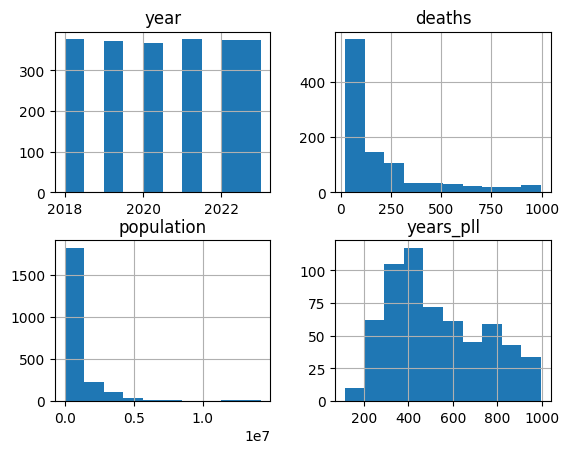

In [78]:
# Inspect histogram by numerical column
df.hist()

# Show all plots
plt.show()

## Initial Data Distribution for Categorical Columns 

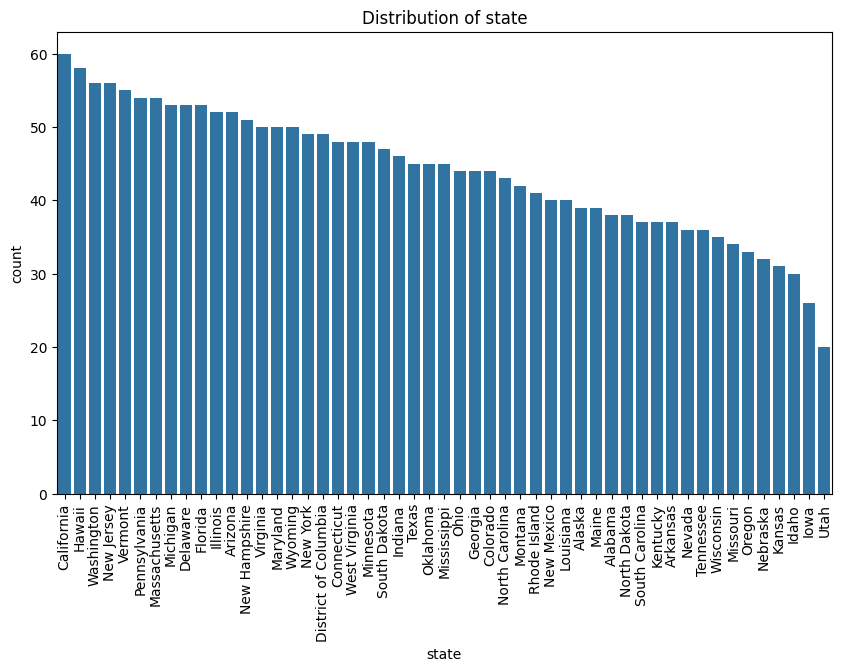

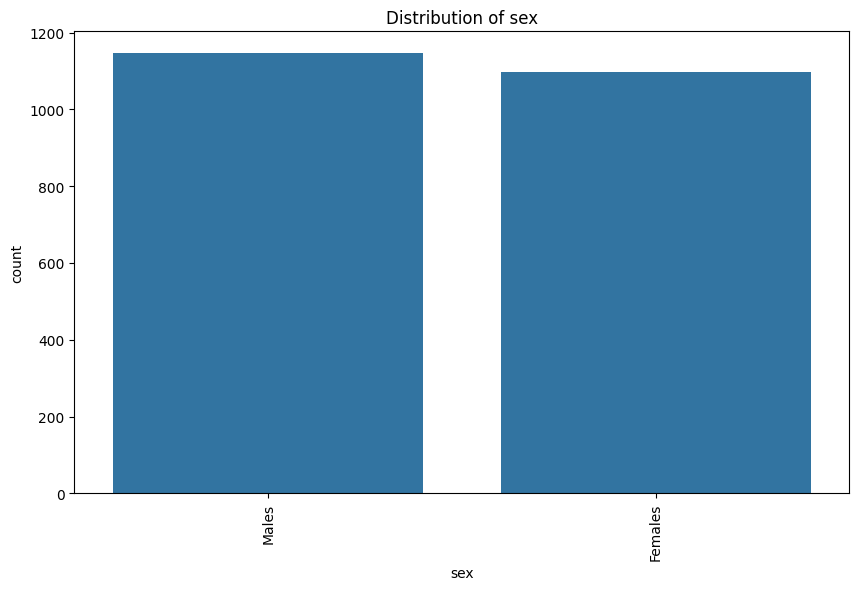

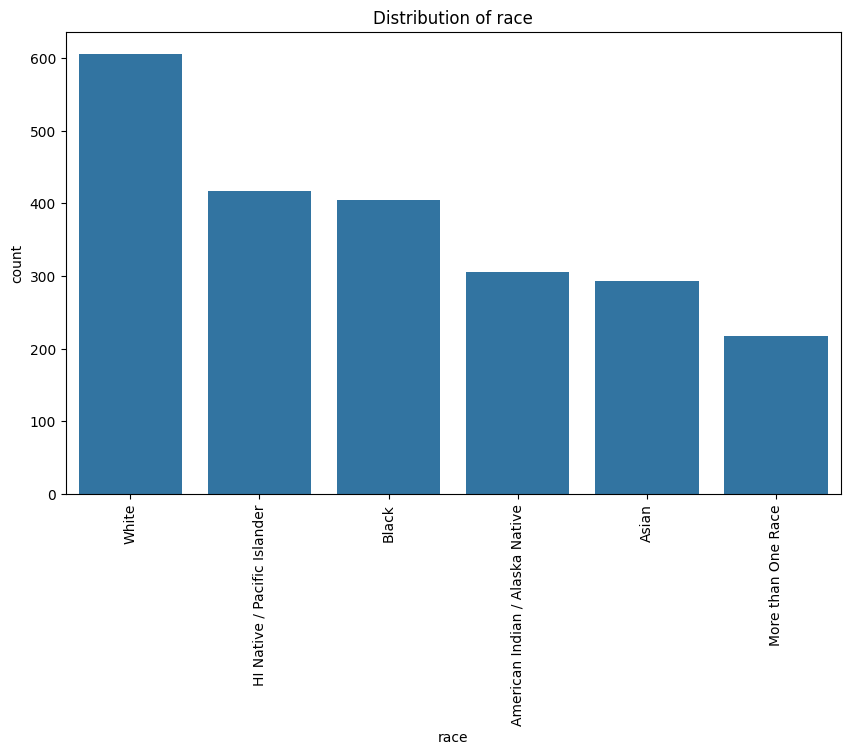

In [80]:
# Inspect value counts by categorical column
df.value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include='object').columns:
    # Display count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


## Initial Visualizations & Discussion

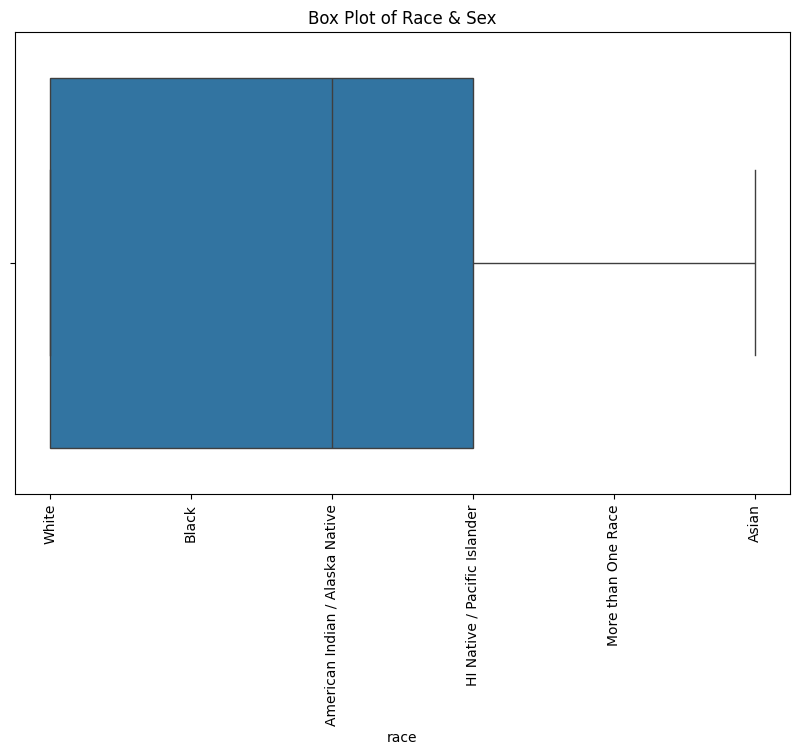

In [83]:
# Create a box plot to depict outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['race'])

# Set the title and labels
plt.xticks(rotation=90)
plt.title('Box Plot of Race & Sex')
plt.xlabel('race')

# Show the plot
plt.show()

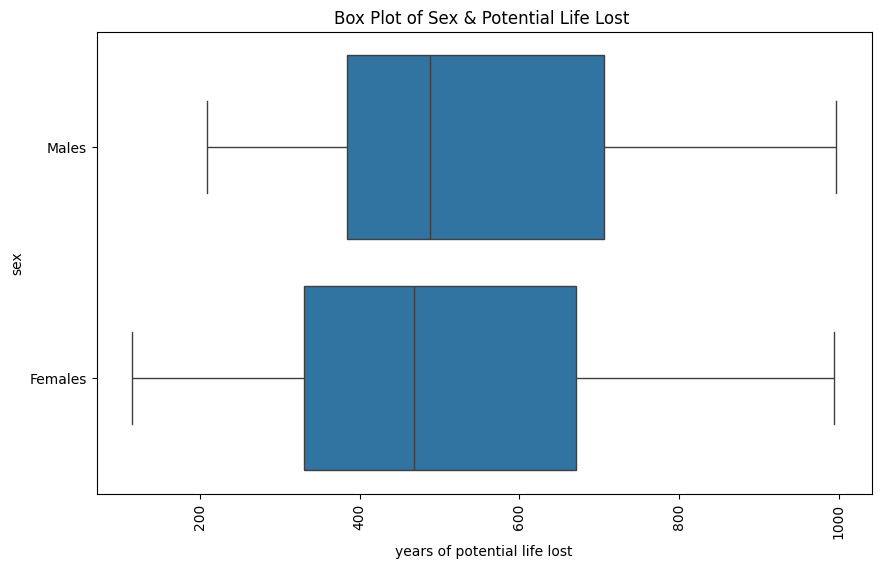

In [86]:
# Create a box plot to depict outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="years_pll", y="sex")

# Set the title and labels
plt.xticks(rotation=90)
plt.title('Box Plot of Sex & Potential Life Lost ')
plt.xlabel('years of potential life lost')

# Show the plot
plt.show()

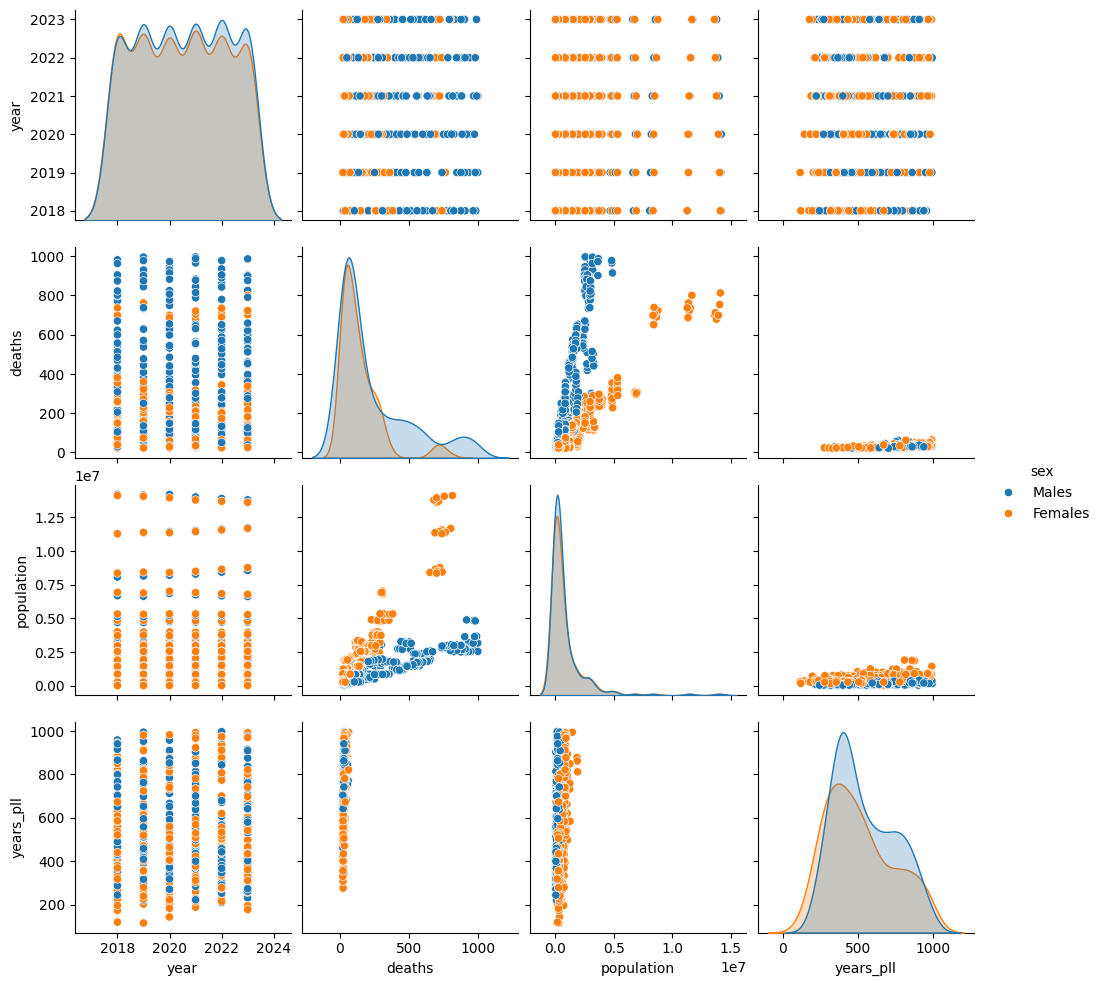

In [90]:
sns.pairplot(df, hue="sex")